In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('arma_Small.csv')
df.head()

ID  DATASET  MODEL  TIME  POSITION  \
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0      0     0         0   
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0      0     0         1   
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0      0     0         2   
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0      0     0         3   
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0      0     0         4   

    VALUE  
0  0.4539  
1  0.4126  
2  0.2572  
3  0.1897  
4  0.3569

In [3]:
df.VALUE

0         0.4539
1         0.4126
2         0.2572
3         0.1897
4         0.3569
           ...  
153595    2.2252
153596    2.2167
153597    2.0129
153598    2.2151
153599    2.0082
Name: VALUE, Length: 153600, dtype: float64

<AxesSubplot:>

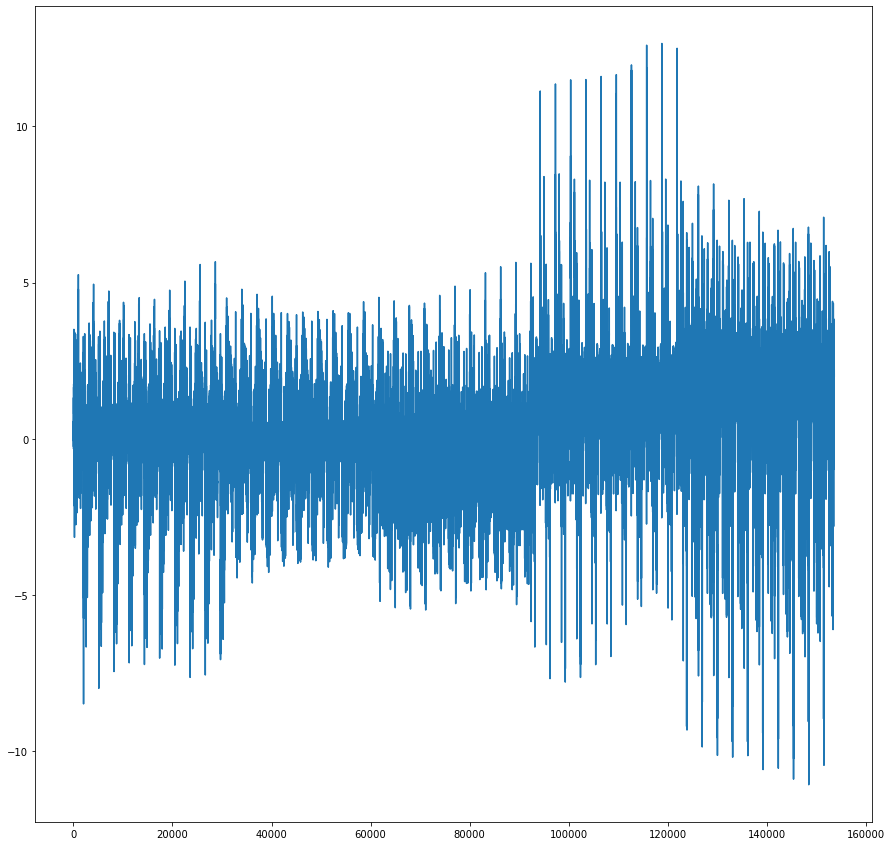

In [4]:
figure(figsize=(15,15))
new = df.VALUE
new.plot()

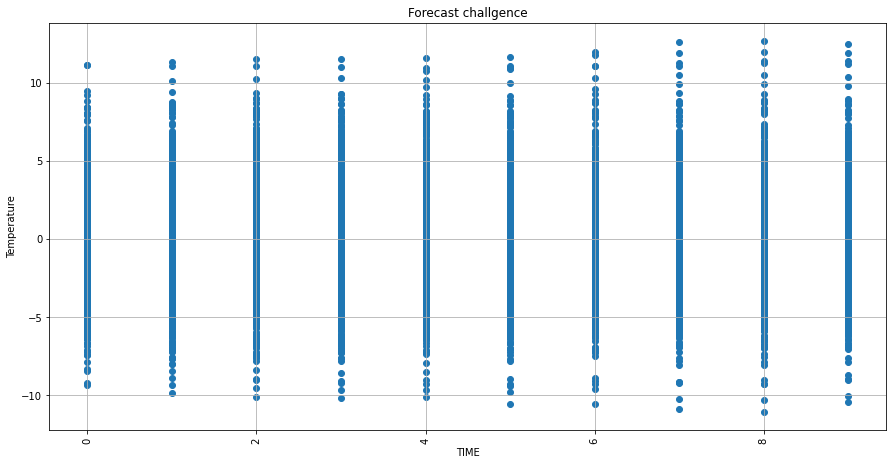

In [5]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(df['TIME'], df['VALUE'])
plt.title('Forecast challgence')
plt.ylabel('Temperature')
plt.xlabel('TIME')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

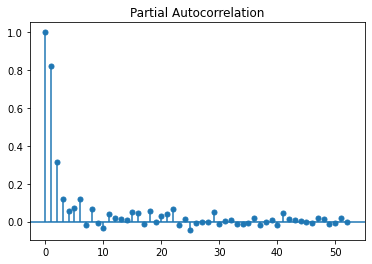

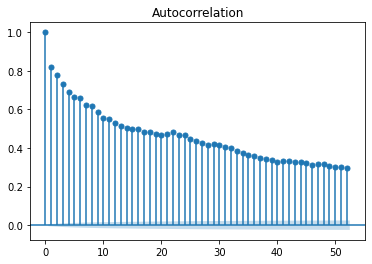

In [6]:
plot_pacf(df['VALUE']);
plot_acf(df['VALUE']);

In [7]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [8]:
#ps = range(0, 8, 1)
#d = 1
#qs = range(0, 8, 1)
## Create a list with all possible combination of parameters
#parameters = product(ps, qs)
#parameters_list = list(parameters)
#order_list = []
#for each in parameters_list:
#    each = list(each)
#    each.insert(1, 1)
#    each = tuple(each)
#    order_list.append(each)
    
#result_df = optimize_ARIMA(order_list, exog=df['VALUE'])
#result_df

In [9]:
best_model = SARIMAX(df['VALUE'], order=(4,1,4)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:               153600
Model:               SARIMAX(4, 1, 4)   Log Likelihood             -186496.043
Date:                Sat, 27 Feb 2021   AIC                         373010.085
Time:                        14:26:55   BIC                         373099.564
Sample:                             0   HQIC                        373036.726
                             - 153600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9485      0.006   -153.633      0.000      -0.961      -0.936
ar.L2          0.0436      0.006      7.125      0.000       0.032       0.056
ar.L3          0.7224      0.005    159.486      0.0

In [18]:
predictionArray = np.array(best_model.predict(start=1, end=100))
type(predictionArray)

numpy.ndarray

In [11]:
dfTest = pd.read_csv('X_sample.csv')
dfTest.head()

ID  DATASET  MODEL  TIME  POSITION  \
0  DATA_0000_MODEL_0005_TIME_0000_POS_0000        0      5     0         0   
1  DATA_0000_MODEL_0005_TIME_0000_POS_0001        0      5     0         1   
2  DATA_0000_MODEL_0005_TIME_0000_POS_0002        0      5     0         2   
3  DATA_0000_MODEL_0005_TIME_0000_POS_0003        0      5     0         3   
4  DATA_0000_MODEL_0005_TIME_0000_POS_0004        0      5     0         4   

    VALUE  
0  0.7549  
1  0.6581  
2  0.6281  
3  0.5111  
4  0.5258

In [15]:
arrayToTest = np.array(dfTest.VALUE)
type(arrayToTest)

numpy.ndarray

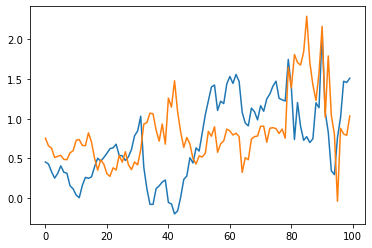

In [21]:
plt.plot(predictionArray)
plt.plot(arrayToTest)